In [1]:
# import Numpy and Pandas
import numpy as np
import pandas as pd

# for reading and displaying images, import imread and matplotlib

import matplotlib.pyplot as plt
# for creating validation set, import train_test_split; understand how the function works

# for evaluating the model, import accuracy_score from sklearn

# Import necessary PyTorch libraries and modules
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
# Import dataset from pytorch vision - Fashion MNIST
composed = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
train_data = torchvision.datasets.FashionMNIST(root='/.data',train=True,transform=composed,download=True)
test_data = torchvision.datasets.FashionMNIST(root='/.data',train=False,transform=composed)

In [10]:
batch_size = 40
num_epoch = 10
learning_rate =0.005

In [4]:
train_load = torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_load = torch.utils.data.DataLoader(dataset=test_data,batch_size=100,shuffle=False)


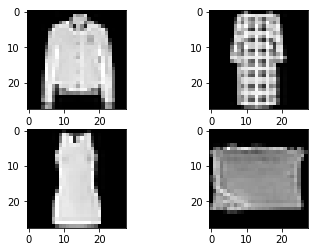

In [5]:
a = next(iter(train_load))
x ,labels = a
i=0
for y in x:
    if i==4:
        break
    plt.subplot(2,2,i+1)
    plt.imshow(y[0],cmap="gray")
    i+=1
    

In [11]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*4*4,250)
        self.fc2 = nn.Linear(250,120)
        self.fc3 = nn.Linear(120,10)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1,16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [7]:
model = Model()

    # defining the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=0.001)
    # defining the loss function
criterion = nn.CrossEntropyLoss()  

In [12]:
for epoch in range(num_epoch):
    for i,(a,b) in enumerate(train_load):
        optimizer.zero_grad()
        y_predicted = model.forward(a)
        loss = criterion(y_predicted,b)
        
        # clear the gradients
        loss.backward()
        optimizer.step()
        # compute the model output
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        # propagate loss backwards
        # update model weights
        if i%1000==0:
            print("loss:{0} i is {1}".format(loss.item(),i))
    print('='*50)   

loss:0.5037806630134583 i is 0
loss:0.2773326337337494 i is 1000
loss:0.37616854906082153 i is 0
loss:0.46413394808769226 i is 1000
loss:0.31559744477272034 i is 0
loss:0.36513277888298035 i is 1000
loss:0.4264891445636749 i is 0
loss:0.2632545530796051 i is 1000
loss:0.2010730803012848 i is 0
loss:0.2149285078048706 i is 1000
loss:0.2528058886528015 i is 0
loss:0.28161540627479553 i is 1000
loss:0.17946816980838776 i is 0
loss:0.1263788640499115 i is 1000
loss:0.24900901317596436 i is 0
loss:0.18791326880455017 i is 1000
loss:0.19443000853061676 i is 0
loss:0.3752870559692383 i is 1000
loss:0.2719062566757202 i is 0
loss:0.22703057527542114 i is 1000


In [13]:
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_load:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print((100*correct)/total)

87.95
